In [1]:
import os
import cv2
import glob
from pathlib import Path
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

# PlantDoc Dataset

In [3]:
if not os.path.isdir('up'):
  !git clone https://github.com/joaopauloschuler/PlantDoc-Object-Detection-Dataset.git up

Cloning into 'up'...
remote: Enumerating objects: 5190, done.
remote: Total 5190 (delta 0), reused 0 (delta 0), pack-reused 5190
Receiving objects: 100% (5190/5190), 941.89 MiB | 24.89 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
Updating files: 100% (5199/5199), done.


In [4]:
up_data_dir = os.getcwd()+"/up/TRAIN"
up_test_dir = os.getcwd()+"/up/TEST"
data_dir = "cropped_train/"
test_dir = "cropped_test/"
all_dir = "cropped_all/"

In [5]:
def CropImages(orig_data_dir, dest_data_dir, csv_file, include_original=False, verbose=True, prefix='img_'):
  # Load the CSV file.
  with open (csv_file, "r") as myfile:
    csv_lines=myfile.readlines()

  # Transform the CSV file into an array  
  line_count = 0
  a_lines = []
  for str_line in csv_lines:
    if line_count > 0: 
      a_line = str_line.replace('\n', '').split(',')
      a_lines.append(a_line)
    line_count = line_count + 1
  #a_lines = np.array(a_lines, dtype=object)
  
  # create destination folder
  if not os.path.isdir(dest_data_dir):
    os.mkdir(dest_data_dir)

  # Save cropped images
  line_count = 0
  failed_count = 0
  original_count = 0
  last_image_file = ''
  for a_line in a_lines:
    dest_folder_name = dest_data_dir+'/'+a_line[3]
    dest_file_name = dest_folder_name+'/'+prefix+str(line_count)+'.jpg'
    orig_file_name = orig_data_dir+'/'+ a_line[0]
    print(line_count,':', a_line, dest_file_name)
    if last_image_file != orig_file_name:
      if os.path.isfile(orig_file_name):
        img = cv2.imread(orig_file_name)
        #cv2_imshow(img)
        last_image_file = orig_file_name
        can_load = True
        original_count = original_count + 1
        if verbose: print("Original imgage shape",img.shape)
        if (include_original):
          if not os.path.isdir(dest_folder_name):
            os.mkdir(dest_folder_name)
          cv2.imwrite(dest_folder_name+'/ori_'+prefix+str(original_count)+'.jpg',img)  
      else:
        if verbose: print('File does not exist:', orig_file_name)
        can_load = False
        #break
    if (can_load):
      y1 = int(a_line[4])
      x1 = int(a_line[5])
      y2 = int(a_line[6])
      x2 = int(a_line[7])

      x_min = np.min([x1, x2])
      x_max = np.max([x1, x2])
      y_min = np.min([y1, y2])
      y_max = np.max([y1, y2])

      crop_img = img[x_min:x_max, y_min:y_max]
      if verbose: print("Cropped imgage shape",crop_img.shape,':', x_min, x_max, y_min, y_max,' deltas:',x_max - x_min, y_max - y_min)
      if not os.path.isdir(dest_folder_name):
        os.mkdir(dest_folder_name)
      if ( (crop_img.shape[0]==0) or (crop_img.shape[1]==0)):
        failed_count = failed_count + 1
        if verbose: print("Failed cropping.");
      else:
        cv2.imwrite(dest_file_name,crop_img)
    else:
      failed_count = failed_count + 1
    line_count = line_count + 1
  print("Processed files:", line_count, "Failed count: ", failed_count, "Original count:", original_count)

In [6]:
if not os.path.isdir(data_dir):
  CropImages(orig_data_dir=up_data_dir, dest_data_dir=data_dir, csv_file='up/train_labels.csv', include_original=False, prefix='train_')

0 : ['cherry-tree-leaves-and-fruits.jpg', '350', '300', 'Cherry leaf', '198', '77', '299', '252'] cropped_train//Cherry leaf/train_0.jpg
Original imgage shape (300, 350, 3)
Cropped imgage shape (175, 101, 3) : 77 252 198 299  deltas: 175 101
1 : ['cherry-tree-leaves-and-fruits.jpg', '350', '300', 'Cherry leaf', '3', '114', '148', '235'] cropped_train//Cherry leaf/train_1.jpg
Cropped imgage shape (121, 145, 3) : 114 235 3 148  deltas: 121 145
2 : ['cherry-tree-leaves-and-fruits.jpg', '350', '300', 'Cherry leaf', '30', '184', '189', '297'] cropped_train//Cherry leaf/train_2.jpg
Cropped imgage shape (113, 159, 3) : 184 297 30 189  deltas: 113 159
3 : ['cherry-tree-leaves-and-fruits.jpg', '350', '300', 'Cherry leaf', '226', '4', '346', '83'] cropped_train//Cherry leaf/train_3.jpg
Cropped imgage shape (79, 120, 3) : 4 83 226 346  deltas: 79 120
4 : ['peach-and-leaf-stock-image-2809275.jpg', '1300', '1099', 'Peach leaf', '237', '479', '527', '810'] cropped_train//Peach leaf/train_4.jpg
Origi

In [7]:
if not os.path.isdir(test_dir):
  CropImages(orig_data_dir=up_test_dir, dest_data_dir=test_dir, csv_file='up/test_labels.csv', include_original=False, prefix='test_')

0 : ['Black%20rot%20on%20foliage.jpg', '1060', '795', 'grape leaf black rot', '1', '58', '859', '732'] cropped_test//grape leaf black rot/test_0.jpg
Original imgage shape (795, 1060, 3)
Cropped imgage shape (674, 858, 3) : 58 732 1 859  deltas: 674 858
1 : ['pepper_leaf.jpg', '300', '400', 'Bell_pepper leaf', '40', '58', '251', '392'] cropped_test//Bell_pepper leaf/test_1.jpg
Original imgage shape (400, 300, 3)
Cropped imgage shape (334, 211, 3) : 58 392 40 251  deltas: 334 211
2 : ['depositphotos_1323264-Raspberry-leaf-on-white.jpg', '1024', '772', 'Raspberry leaf', '98', '75', '964', '710'] cropped_test//Raspberry leaf/test_2.jpg
Original imgage shape (772, 1024, 3)
Cropped imgage shape (635, 866, 3) : 75 710 98 964  deltas: 635 866
3 : ['dscn6689.jpg', '1024', '768', 'Tomato mold leaf', '140', '102', '887', '712'] cropped_test//Tomato mold leaf/test_3.jpg
Original imgage shape (768, 1024, 3)
Cropped imgage shape (610, 747, 3) : 102 712 140 887  deltas: 610 747
4 : ['IMG_1246.jpg', '

In [8]:
if not os.path.isdir(all_dir):
  !mkdir cropped_all
  ! cp -r cropped_test/* cropped_all/
  ! cp -r cropped_train/* cropped_all/

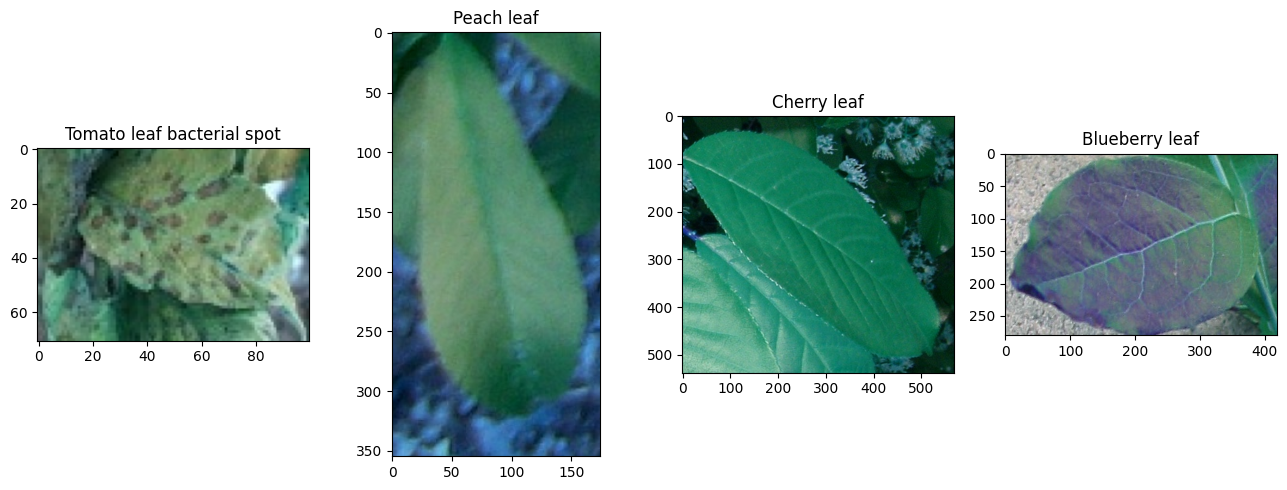

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13, 5))
img_sample = random.sample(glob.glob('/kaggle/working/cropped_all/**/**'), 4)
for i, img_file in enumerate(img_sample):
    img = cv2.imread(img_file)
    axs[i].imshow(img)
    axs[i].set_title(Path(img_file).parent.name)

plt.tight_layout()
plt.show()

In [3]:
train_images = glob.glob('/kaggle/working/cropped_all/**/**')
train_classes = glob.glob('/kaggle/working/cropped_all/*')
print(f'# images: {len(train_images)}')
print(f'# classes: {len(train_classes)}')

# images: 8883
# classes: 29


In [4]:
for class_dir in train_classes:
    class_dir_path = Path(class_dir)
    class_name = class_dir_path.name
    class_images = glob.glob(f'{class_dir}/*')
    print(f'{class_name:<55}: {len(class_images)}')

Bell_pepper leaf spot                                  : 263
Corn rust leaf                                         : 127
grape leaf                                             : 220
Tomato Septoria leaf spot                              : 436
Tomato mold leaf                                       : 293
Apple rust leaf                                        : 179
Tomato leaf yellow virus                               : 810
Corn leaf blight                                       : 370
Tomato leaf bacterial spot                             : 280
Potato leaf late blight                                : 250
Tomato two spotted spider mites leaf                   : 2
Squash Powdery mildew leaf                             : 254
Tomato leaf late blight                                : 221
Tomato leaf mosaic virus                               : 261
Corn Gray leaf spot                                    : 78
Tomato Early blight leaf                               : 214
Apple leaf                 

In [2]:
import os

if not os.path.isdir('k'):
 !git clone https://github.com/joaopauloschuler/k-neural-api.git k
else:
 !cd k && git pull

!cd k && pip install .

Already up to date.
Processing /kaggle/working/k
  Preparing metadata (setup.py) ... done
  Created wheel for cai: filename=cai-0.1.7-py3-none-any.whl size=61388 sha256=0f6d8402b71825f39a5828e270bd6c6fc1d87ad75775f2057991e2a4e62db307
  Stored in directory: /tmp/pip-ephem-wheel-cache-yix5e22s/wheels/7f/63/1a/ed2b6234f76aae55efe76492246448486e41178bd0b5682ecf
Successfully built cai


In [3]:
import tensorflow as tf
import random
import cv2
import skimage

import matplotlib.pyplot as plt
import numpy as np
from cai import datasets

2024-06-22 17:36:47.695926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 17:36:47.696024: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 17:36:47.843350: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
all_dir = '/kaggle/working/cropped_all'

In [5]:
train_x, val_x, test_x, train_y, val_y, test_y, classweight, classes = datasets.load_images_from_folders(seed=7,
  root_dir=all_dir, lab=True, 
  verbose=True, bipolar=False, base_model_name='plant_doc',
  has_training=True, has_validation=True, has_testing=True,
  training_size=0.65, validation_size=0.15, test_size=0.2,
  target_size=(224, 224))

print(train_x.shape,val_x.shape,test_x.shape)
print(train_y.shape,val_y.shape,test_y.shape)

Loading  29  classes.
loading train images
train shape is: (5761, 224, 224, 3)
loading validation images
validation shape is: (1333, 224, 224, 3)
loading test images
test shape is: (1789, 224, 224, 3)
Channel  0  min: 0.0  max: 1.0
Channel  1  min: 0.072484195  max: 0.9092136
Channel  2  min: 0.03479737  max: 0.9700128
Loaded.
(5761, 224, 224, 3) (1333, 224, 224, 3) (1789, 224, 224, 3)
(5761, 29) (1333, 29) (1789, 29)


[    0.         -1371.25716448  7937.39920467]
[0.        0.6043554 0.       ]


/tmp/ipykernel_34/1297891950.py:13: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 50173 negative Z values that have been clipped to zero
  ab_channel = skimage.color.lab2rgb(ab_channel)


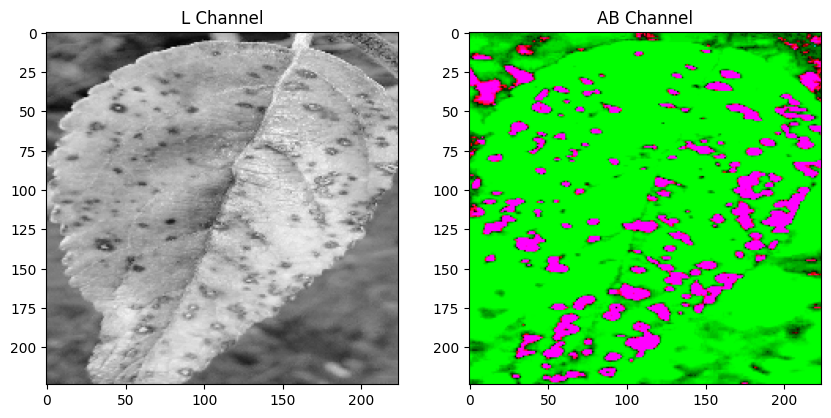

In [8]:
iterator = iter(train_x)
next(iterator)
next(iterator)
img = next(iterator)

l_channel = img[:, :, 0]

ab_channel = img[:, :, 1:]
ones_array = np.ones((ab_channel.shape[0], ab_channel.shape[1], 1))
ab_channel = np.concatenate((ones_array, ab_channel), axis=2)
ab_channel = (ab_channel * [100, 255, 255] - [0, 128, 128]) * [0, 255, 255]
print(ab_channel[0][0])
ab_channel = skimage.color.lab2rgb(ab_channel)

print(ab_channel[0][0])

# Plot the image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)
axs[0].imshow(l_channel, cmap='gray')
axs[0].set_title('L Channel')
axs[1].imshow(ab_channel)
axs[1].set_title('AB Channel')

# Show the plot
plt.show()

# Two Branch Inception V3

In [9]:
module_filters = [
    [64, 48, 64, 64, 96, 96, 32],
    [64, 48, 64, 64, 96, 96, 64],
    [64, 48, 64, 64, 96, 96, 64],
    [384, 64, 96, 96],
    [192, 128, 128, 192, 128, 128, 128, 128, 192, 192],
    [192, 160, 160, 192, 160, 160, 160, 160, 192, 192],
    [192, 192, 192, 192, 192, 192, 192, 192, 192, 192],
    [192, 192, 192, 192, 192, 192, 192, 192, 192, 192],
    [192, 320, 192, 192, 192, 192],
    [320, 384, 384, 384, 448, 384, 384, 384, 192],
    [320, 384, 384, 384, 448, 384, 384, 384, 192],
]

In [10]:
@tf.keras.utils.register_keras_serializable()
class CopyChannels(tf.keras.layers.Layer):
    """
    This layer copies channels from channel_start the number of channels given in channel_count.
    """
    def __init__(self,
                 channel_start=0,
                 channel_count=1,
                 **kwargs):
        self.channel_start=channel_start
        self.channel_count=channel_count
        super(CopyChannels, self).__init__(**kwargs)

    def compute_output_shape(self, input_shape):
        return (32, input_shape[0], input_shape[1], self.channel_count)

    def call(self, x):
        return x[:, :, :, self.channel_start:(self.channel_start+self.channel_count)]

    def get_config(self):
        config = {
            'channel_start': self.channel_start,
            'channel_count': self.channel_count
        }
        base_config = super(CopyChannels, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [11]:
def conv2d_bn(x, filters, kernel_size, padding='same', strides=1, name=None):
    x = tf.keras.layers.Conv2D(filters, kernel_size, strides=strides, padding=padding, use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization(scale=False)(x)
    return tf.keras.layers.Activation('relu')(x)

In [12]:
def inception_module_1(x, filters):
  t1 = conv2d_bn(x, filters[0], 1)

  t2 = conv2d_bn(x, filters[1], 1)
  t2 = conv2d_bn(t2, filters[2], 3)

  t3 = conv2d_bn(x, filters[3], 1)
  t3 = conv2d_bn(t3, filters[4], 3)
  t3 = conv2d_bn(t3, filters[5], 3)

  t4 = tf.keras.layers.MaxPooling2D(3, strides=1, padding='same')(x)
  t4 = conv2d_bn(t4, filters[6], 1)

  return tf.keras.layers.concatenate([t1, t2, t3, t4], axis=3)

In [13]:
def inception_module_2(x, filters):
  t1 = conv2d_bn(x, filters[0], 1)

  t2 = conv2d_bn(x, filters[1], 1)
  t2 = conv2d_bn(t2, filters[2], (1,7))
  t2 = conv2d_bn(t2, filters[3], (7,1))

  t3 = conv2d_bn(x, filters[4], 1)
  t3 = conv2d_bn(t3, filters[5], (1,7))
  t3 = conv2d_bn(t3, filters[6], (7,1))
  t3 = conv2d_bn(t3, filters[7], (1,7))
  t3 = conv2d_bn(t3, filters[8], (7,1))

  t4 = tf.keras.layers.MaxPooling2D(3, strides=1, padding='same')(x)
  t4 = conv2d_bn(t4, filters[9], 1)

  return tf.keras.layers.concatenate([t1, t2, t3, t4], axis=3)

In [14]:
def inception_module_3(x, filters):
  t1 = conv2d_bn(x, 384, 3)

  t2 = conv2d_bn(x, filters[1], 1)
  t2_1 = conv2d_bn(t2, filters[2], (1,3))
  t2_2 = conv2d_bn(t2, filters[3], (3,1))
  t2 = tf.keras.layers.concatenate([t2_1, t2_2], axis=3)

  t3 = conv2d_bn(x, filters[4], 1)
  t3 = conv2d_bn(t3, filters[5], 1)
  t3_1 = conv2d_bn(t3, filters[6], (1,3))
  t3_2 = conv2d_bn(t3, filters[7], (3,1))
  t3 = tf.keras.layers.concatenate([t3_1, t3_2], axis=3)

  t4 = tf.keras.layers.MaxPooling2D(3, strides=1, padding='same')(x)
  t4 = conv2d_bn(t4, filters[8], 1)

  return tf.keras.layers.concatenate([t1, t2, t3, t4], axis=3)

In [15]:
def grid_size_reduction_1(x, filters):
    t1 = conv2d_bn(x, filters[0], 3, strides=(2,2), padding="valid")

    t2 = conv2d_bn(x, filters[1], 1)
    t2 = conv2d_bn(t2, filters[2], 3)
    t2 = conv2d_bn(t2, filters[3], 3, strides=(2,2), padding="valid")

    t3 = tf.keras.layers.MaxPooling2D(3, strides=(2,2))(x)

    return tf.keras.layers.concatenate([t1, t2, t3], axis=3)

In [16]:
def grid_size_reduction_2(x, filters):
    t1 = conv2d_bn(x, filters[0], 1)
    t1 = conv2d_bn(t1, filters[1], 3, strides=(2,2), padding="valid")

    t2 = conv2d_bn(x, filters[2], 1)
    t2 = conv2d_bn(t2, filters[3], (1,7))
    t2 = conv2d_bn(t2, filters[4], (7,1))
    t2 = conv2d_bn(t2, filters[5], 3, strides=(2,2), padding="valid")

    t3 = tf.keras.layers.MaxPooling2D(3, strides=(2,2))(x)

    return tf.keras.layers.concatenate([t1, t2, t3], axis=3)

In [17]:
def two_path_inception_v3(
                include_top=True,
                include_first_block=True,
                weights=None, #'two_paths_plant_leafs'
                input_shape=(128,128,3),
                pooling=None,
                classes=38,
                two_paths_partial_first_block=0,
                two_paths_first_block=True,
                l_ratio=0.2,
                ab_ratio=0.8,
                max_mix_idx=12,
                model_name='two_path_inception_v3',
                **kwargs):

    img_input = tf.keras.layers.Input(shape=input_shape)

    if include_first_block:
        if two_paths_first_block:
            if (l_ratio>0):
                l_branch = CopyChannels(0,1)(img_input)
                l_branch = conv2d_bn(l_branch, int(round(32*l_ratio)), (3, 3), strides=(2, 2), padding='valid')
                l_branch = conv2d_bn(l_branch, int(round(32*l_ratio)), (3, 3), padding='valid')
                l_branch = conv2d_bn(l_branch, int(round(64*l_ratio)), (3, 3))
                l_branch = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(l_branch)

            if (ab_ratio>0):
                ab_branch = CopyChannels(1,2)(img_input)
                ab_branch = conv2d_bn(ab_branch, int(round(32*ab_ratio)), (3, 3), strides=(2, 2), padding='valid')
                ab_branch = conv2d_bn(ab_branch, int(round(32*ab_ratio)), (3, 3), padding='valid')
                ab_branch = conv2d_bn(ab_branch, int(round(64*ab_ratio)), (3, 3))
                ab_branch = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(ab_branch)

            if (l_ratio>0):
                if (ab_ratio>0):
                    x = tf.keras.layers.Concatenate(axis=3, name='concat_first_block')([l_branch, ab_branch])
                else:
                    x = l_branch
            else:
                x = ab_branch
        else:
            single_branch = conv2d_bn(img_input, 32, (3, 3), strides=(2, 2), padding='valid')
            single_branch = conv2d_bn(single_branch, 32, (3, 3), padding='valid')
            single_branch = conv2d_bn(single_branch, 64, (3, 3))
            single_branch = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(single_branch)
            # print('single path first block')
            x = single_branch

    if max_mix_idx >= 0:
        for i in range(max_mix_idx):
          if i < 3:
            x = inception_module_1(x, module_filters[i])
          elif i == 3:
            x = grid_size_reduction_1(x, module_filters[i])
          elif i < 8:
            x = inception_module_2(x, module_filters[i])
          elif i == 8:
            x = grid_size_reduction_2(x, module_filters[i])
          else:
            x = inception_module_3(x, module_filters[i])

    if include_top:
        # Classification block
        x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = tf.keras.layers.Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = tf.keras.layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = tf.keras.layers.GlobalMaxPooling2D()(x)

    inputs = img_input
    # Create model.
    model = tf.keras.models.Model(inputs, x, name=model_name)
    return model

# Experiments

In [18]:
checkpoint_path = "/kaggle/working/two_branch_inception_v3_test/cp-{epoch:04d}.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         monitor='val_accuracy',
                                                         save_weights_only=False,
                                                         save_best_only=True,
                                                         mode='max',
                                                         verbose=1)

In [19]:
model = two_path_inception_v3(max_mix_idx=6, classes=29, input_shape=(224,224,3))

In [20]:
model.summary()

Model: "two_path_inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ copy_channels       │ (32, None, 224,   │          0 │ input_layer[0][0] │
│ (CopyChannels)      │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ copy_channels_1     │ (32, None, 224,   │          0 │ input_layer[0][0] │
│ (CopyChannels)      │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (32, None, 111,   │         54 │ copy_channels[0]… │
│                     │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (32, None, 111,   │        468 │ copy_channels_1[… │
│                     │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (32, None, 111,   │         18 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (32, None, 111,   │         78 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (32, None, 111,   │          0 │ batch_normalizat… │
│ (Activation)        │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (32, None, 111,   │          0 │ batch_normalizat… │
│ (Activation)        │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (32, None, 109,   │        324 │ activation[0][0]  │
│                     │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (32, None, 109,   │      6,084 │ activation_3[0][… │
│                     │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (32, None, 109,   │         18 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (32, None, 109,   │         78 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (32, None, 109,   │          0 │ batch_normalizat… │
│ (Activation)        │ 6)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (32, None, 109,   │          0 │ batch_normalizat… │
│ (Activation)        │ 26)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (32, None, 109,   │        702 │ activation_1[0][… │
│                     │ 13)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (32, None, 109,   │     11,934 │ activation_4[0][

 Total params: 4,833,755 (18.44 MB)

 Trainable params: 4,822,779 (18.40 MB)

 Non-trainable params: 10,976 (42.88 KB)

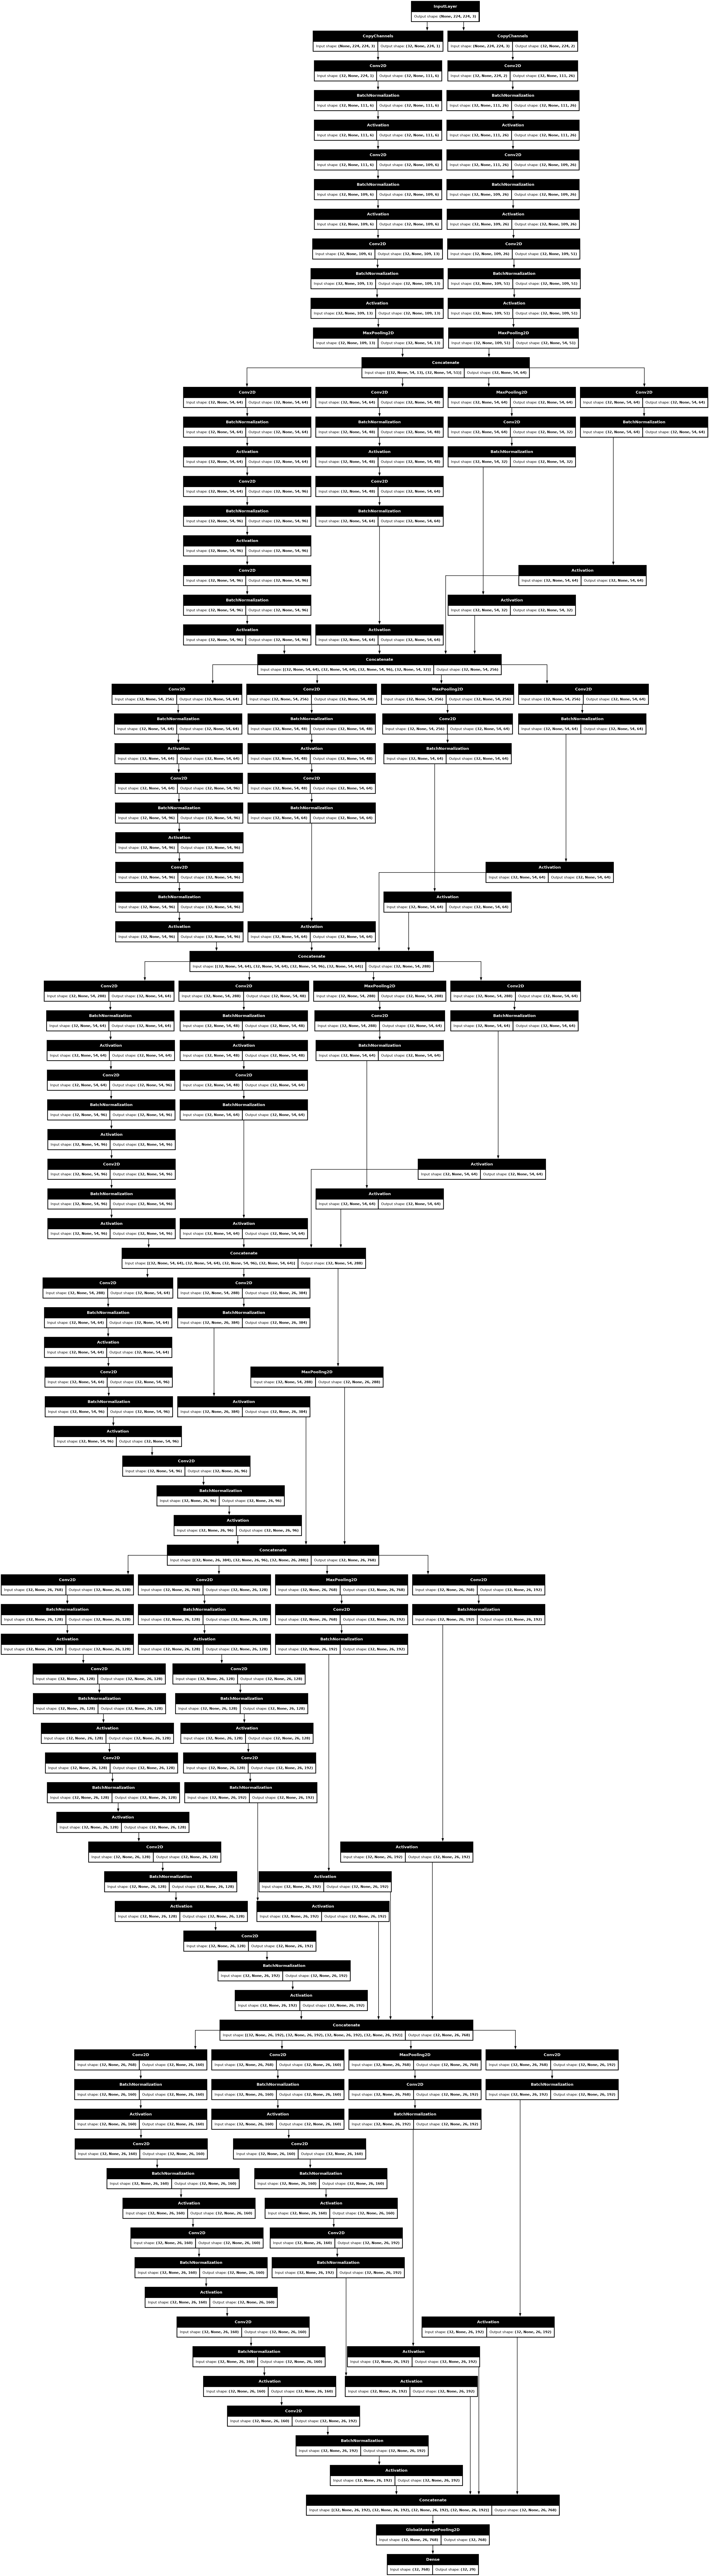

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=76)

In [22]:
model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
        metrics=['accuracy'])

In [24]:
monitor='val_accuracy'
epochs=50
batch_size = 32

history = model.fit(
    x=train_x, y=train_y,
    steps_per_epoch=len(train_x) // batch_size,
    verbose=1,
    epochs=epochs,
    validation_data=[val_x, val_y],
    callbacks=[checkpoint_callback]
)

Epoch 1/50


I0000 00:00:1719078079.445348     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719078079.503136     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


174/180 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.1902 - loss: 2.9086

W0000 00:00:1719078187.158056     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


175/180 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.1903 - loss: 2.9078

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
W0000 00:00:1719078205.952672     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.09227, saving model to /kaggle/working/two_branch_inception_v3_test/cp-0001.keras


W0000 00:00:1719078221.659952     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


180/180 ━━━━━━━━━━━━━━━━━━━━ 205s 795ms/step - accuracy: 0.1912 - loss: 2.9037 - val_accuracy: 0.0923 - val_loss: 3.8621
Epoch 2/50
175/180 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.2845 - loss: 2.4914
Epoch 2: val_accuracy improved from 0.09227 to 0.16429, saving model to /kaggle/working/two_branch_inception_v3_test/cp-0002.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 418ms/step - accuracy: 0.2847 - loss: 2.4896 - val_accuracy: 0.1643 - val_loss: 3.2259
Epoch 3/50
175/180 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.3417 - loss: 2.2285
Epoch 3: val_accuracy improved from 0.16429 to 0.21830, saving model to /kaggle/working/two_branch_inception_v3_test/cp-0003.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 419ms/step - accuracy: 0.3419 - loss: 2.2274 - val_accuracy: 0.2183 - val_loss: 2.8177
Epoch 4/50
175/180 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.4069 - loss: 1.9691
Epoch 4: val_accuracy did not improve from 0.21830
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 417ms/step - accuracy: 0.4067

In [25]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

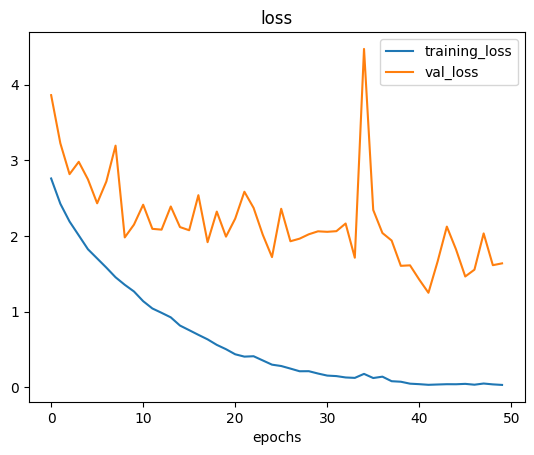

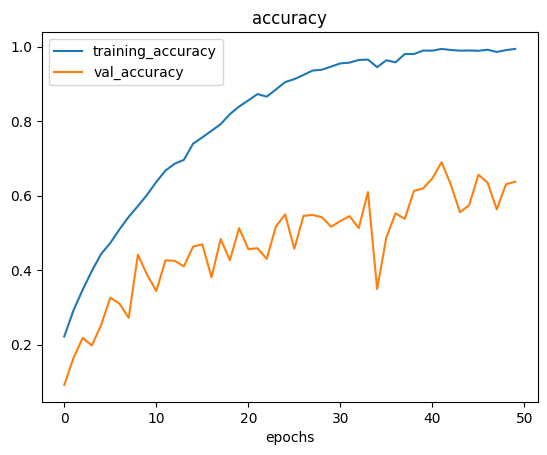

In [26]:
plot_loss_curves(history)

In [27]:
saved = tf.keras.models.load_model('/kaggle/working/two_branch_inception_v3_test/cp-0042.keras')

In [29]:
y_pred = saved.evaluate(x=test_x, y=test_y, verbose=1)

 1/56 ━━━━━━━━━━━━━━━━━━━━ 3:17 4s/step - accuracy: 0.5312 - loss: 2.0522

W0000 00:00:1719082044.651172     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 368ms/step - accuracy: 0.6493 - loss: 1.4343


W0000 00:00:1719082064.924653     117 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [30]:
y_pred

[1.4272533655166626, 0.6634991765022278]